In [44]:
!pip install numpy

In [45]:
import numpy as np

In [47]:
!pip install seaborn

In [48]:
import seaborn as sns

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [41]:
!pip install matplotlib

In [42]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [7]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [8]:
!pip install scikit-learn

# Encoding

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
ode=OrdinalEncoder()

In [11]:
columns=['gender','workex','specialisation']

In [12]:
df[columns]=ode.fit_transform(df[columns])

In [13]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,1.0,67.00,91.00,58.00,0.0,55.0,1.0,58.80,Placed
1,2,1.0,79.33,78.33,77.48,1.0,86.5,0.0,66.28,Placed
2,3,1.0,65.00,68.00,64.00,0.0,75.0,0.0,57.80,Placed
3,4,1.0,56.00,52.00,52.00,0.0,66.0,1.0,59.43,Not Placed
4,5,1.0,85.80,73.60,73.30,0.0,96.8,0.0,55.50,Placed


In [14]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote=SMOTE()

In [17]:
x=df.drop('status',axis=1)
y=df['status']

In [18]:
x_resampled,y_resampled=smote.fit_resample(x,y)

In [19]:
x_resampled.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
0,1,1.0,67.00,91.00,58.00,0.0,55.0,1.0,58.80
1,2,1.0,79.33,78.33,77.48,1.0,86.5,0.0,66.28
2,3,1.0,65.00,68.00,64.00,0.0,75.0,0.0,57.80
3,4,1.0,56.00,52.00,52.00,0.0,66.0,1.0,59.43
4,5,1.0,85.80,73.60,73.30,0.0,96.8,0.0,55.50


In [20]:
y_resampled=y_resampled.reset_index()
y_resampled.drop('index',axis=1,inplace=True)

In [21]:
y_resampled.head()

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed


In [22]:
balanced_df=pd.concat([x_resampled,y_resampled],axis=1)

In [23]:
balanced_df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [24]:
balanced_df

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,1.000000,67.000000,91.000000,58.000000,0.000000,55.000000,1.000000,58.800000,Placed
1,2,1.000000,79.330000,78.330000,77.480000,1.000000,86.500000,0.000000,66.280000,Placed
2,3,1.000000,65.000000,68.000000,64.000000,0.000000,75.000000,0.000000,57.800000,Placed
3,4,1.000000,56.000000,52.000000,52.000000,0.000000,66.000000,1.000000,59.430000,Not Placed
4,5,1.000000,85.800000,73.600000,73.300000,0.000000,96.800000,0.000000,55.500000,Placed
...,...,...,...,...,...,...,...,...,...,...
291,177,0.617065,62.536108,62.960760,62.597846,0.000000,61.108303,1.000000,63.565974,Not Placed
292,192,1.000000,53.145333,63.958788,57.520606,0.479394,77.082423,0.520606,59.096770,Not Placed
293,172,0.000000,50.467361,51.616840,56.149479,0.383160,64.317882,1.000000,59.116925,Not Placed
294,107,1.000000,59.123269,50.776481,55.358841,0.000000,68.864678,0.194120,64.709693,Not Placed


In [66]:
balanced_df['specialisation'].skew()

-0.05785668628895272

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=balanced_df.copy().drop('status',axis=1)

In [27]:
y=balanced_df['status']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
y_train

63     Not Placed
17     Not Placed
215    Not Placed
219    Not Placed
183        Placed
          ...    
188    Not Placed
71         Placed
106    Not Placed
270    Not Placed
102        Placed
Name: status, Length: 236, dtype: object

In [30]:
x_train

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
63,64,1.000000,61.000000,70.000000,64.000000,0.0,68.500000,1.000000,59.500000
17,18,0.000000,55.000000,67.000000,64.000000,0.0,60.000000,0.000000,67.280000
215,126,0.663774,54.301510,46.388302,60.681132,0.0,74.681132,0.663774,59.741347
219,124,1.000000,59.525264,49.532899,59.381316,0.0,77.194476,0.618684,60.846227
183,184,1.000000,65.000000,77.000000,69.000000,0.0,60.000000,1.000000,61.820000
...,...,...,...,...,...,...,...,...,...
188,189,1.000000,61.800000,47.000000,54.380000,0.0,57.000000,0.000000,56.130000
71,72,1.000000,75.000000,70.290000,71.000000,0.0,95.000000,0.000000,66.940000
106,107,1.000000,61.080000,50.000000,54.000000,0.0,71.000000,0.000000,65.690000
270,202,0.000000,59.046043,66.685851,65.000000,0.0,89.544393,1.000000,68.964010


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler()

In [35]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [36]:
x_train

array([[0.29439252, 1.        , 0.4145537 , ..., 0.39361702, 1.        ,
        0.30864662],
       [0.07943925, 0.        , 0.29086786, ..., 0.21276596, 0.        ,
        0.60112782],
       [0.58411215, 0.6637736 , 0.27646897, ..., 0.52513047, 0.6637736 ,
        0.31771982],
       ...,
       [0.4953271 , 1.        , 0.41620284, ..., 0.44680851, 0.        ,
        0.54135338],
       [0.93925234, 0.        , 0.37427423, ..., 0.84137007, 1.        ,
        0.66443645],
       [0.47663551, 0.        , 0.7443826 , ..., 0.15957447, 0.        ,
        0.37669173]])

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
random_forest_Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
random_forest_accuracy = random_forest.score(x_test, y_test)
random_forest_accuracy

0.43333333333333335

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

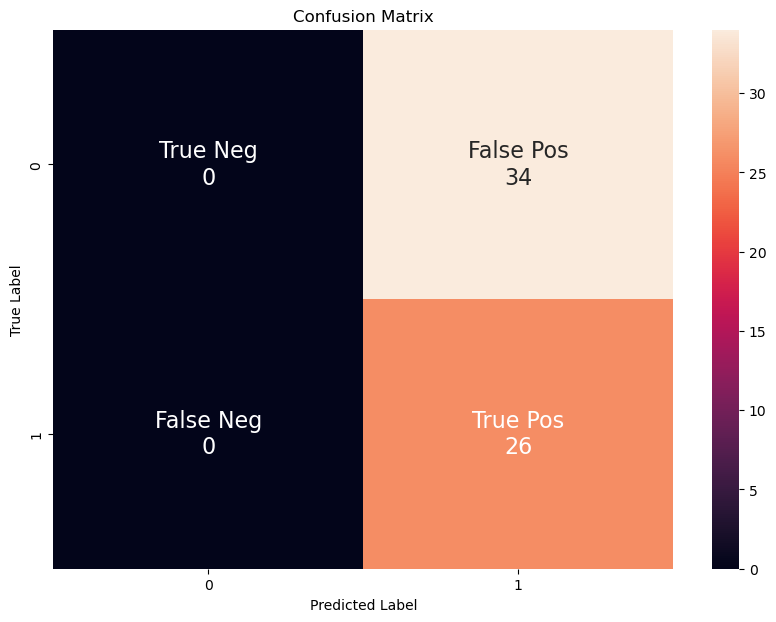

In [49]:
conf_mat = confusion_matrix(y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_Y_pred = gaussian.predict(x_test)
gaussian_accuracy = gaussian.score(x_test, y_test)
gaussian_accuracy

0.43333333333333335

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_Y_pred = lg.predict(x_test)
lg_accuracy = lg.score(x_test, y_test)
lg_accuracy

0.43333333333333335

# Predictive System

In [53]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [54]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


In [55]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))